<a href="https://colab.research.google.com/github/ruan2sl/Exploratory-Data-Analysis-EDA-/blob/main/EDA_(Ruan_Anselmo_Santos_de_Lima).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Tarefa 1: Carregamento e Visualização Inicial
1. Importar bibliotecas essenciais.
2. Carregar o dataset do OpenML.
3. Visualizar as primeiras linhas com head().
4. Identificar o número de linhas e colunas.

O que observar:

• Qual a dimensão do dataset? Há muitas colunas categóricas?

• Há valores ausentes aparentes?

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import umap

# URL padrão
url = "https://www.openml.org/data/get_csv/37"
df = pd.read_csv(url)

# Visualização inicial
print("shape:", df.shape)
display(df.head())

shape: (768, 9)


,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


- Qual a dimensão do dataset? Há muitas colunas categóricas?

  - Dimensão do dataset: O dataset possui 768 linhas e 9 colunas.

  - Colunas categóricas: Há apenas 1 coluna categórica (class). Todas as demais são numéricas.


- Há valores ausentes aparentes?

  - Não existem NaN explícitos, porém há valores 0 que indicam dados faltantes em colunas como skin, insu, plas, pres e mass, pois fisiologicamente não podem ser zero.

##Tarefa 2: Análise de Tipos de Dados e Missing Values
1. Identificar tipos de dados com dtypes.
2. Listar colunas numéricas e categóricas.
3. Calcular número de valores ausentes.
4. Gerar tabela de estatísticas descritivas das numéricas.

O que observar:

• Quais colunas apresentam mais missing values?


• As distribuições parecem simétricas ou distorcidas?

In [20]:
print(df.dtypes)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print("numéricas:", num_cols)
print("categóricas:", cat_cols)
print("missing por coluna:\n", df.isna().sum())

# Observação específica deste dataset:
# No Pima algumas features usam 0 como placeholder para "missing" (ex: Glucose=0, BloodPressure=0, SkinThickness=0, Insulin=0, BMI=0).
# Detectar esses zeros anômalos:
zero_as_missing = ["plas", "pres", "skin", "insu", "mass"]
for c in zero_as_missing:
    if c in df.columns:
        print(c, "zeros:", (df[c]==0).sum())

# Estatísticas descritivas (numéricas)
display(df[num_cols].describe())

preg       int64
plas       int64
pres       int64
skin       int64
insu       int64
mass     float64
pedi     float64
age        int64
class     object
dtype: object
numéricas: ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age']
categóricas: ['class']
missing por coluna:
 preg     0
plas     0
pres     0
skin     0
insu     0
mass     0
pedi     0
age      0
class    0
dtype: int64
plas zeros: 5
pres zeros: 35
skin zeros: 227
insu zeros: 374
mass zeros: 11


,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


- Quais colunas apresentam mais missing values?

  - Missing: o dataset não tem NaN explícitos em muitas versões mas tem zeros em colunas que não deveriam ser zero (plas, pres, skin, insu e mass), é biologicamente impossível ter pressão sanguínea 0, IMC 0 ou glicose 0 e estar vivo. A que mais apresenta missing values é a coluna insu. Esses zeros representam medições faltantes em muitas análises e precisam ser tratados.
- As distribuições parecem simétricas ou distorcidas?

  - Não. A maioria das distribuições é assimétrica (skewed), frequentemente à direita, exceto pres e skin, que tendem mais à esquerda devido aos valores zero.

##Tarefa 3: Análise de Variáveis Categóricas
1. Listar todas as variáveis categóricas.
2. Calcular a distribuição percentual de cada categoria.
3. Visualizar com countplot.
O que observar:

• Quais colunas possuem categorias muito frequentes ou muito raras?

• Isso pode impactar um modelo?

In [22]:
for c in cat_cols + ["Outcome"]:
    if c in df.columns:
        print("\nDistribuição", c)
        print(df[c].value_counts(dropna=False))
        print(df[c].value_counts(normalize=True)*100)


Distribuição class
class
tested_negative    500
tested_positive    268
Name: count, dtype: int64
class
tested_negative    65.104167
tested_positive    34.895833
Name: proportion, dtype: float64


- Quais colunas possuem categorias muito frequentes ou muito raras?

  - Apenas class é categórica.

  - Categoria tested_negative é a mais frequente (~65%).

  - Não há categorias extremamente raras.

- Isso pode impactar um modelo?

  - Sim, o desbalanceamento pode levar o modelo a:

    - priorizar a classe majoritária

    - ter baixa capacidade de identificar tested_positive

    - apresentar acurácia enganosa
  - Por isso, é necessário tratar o desbalanceamento antes do treinamento.

##Tarefa 4: Análise da Classe (Target)
1. Verificar distribuição absoluta e percentual da coluna alvo.
2. Criar um gráfico de barras e um gráfico de pizza.
3. Gerar tabelas cruzadas entre features categóricas e classe.
O que observar:

• A classe está balanceada?

• Quais categorias parecem associadas à classe?


Distribuição da classe (class):
class
tested_negative    500
tested_positive    268
Name: count, dtype: int64
class
tested_negative    65.104167
tested_positive    34.895833
Name: proportion, dtype: float64


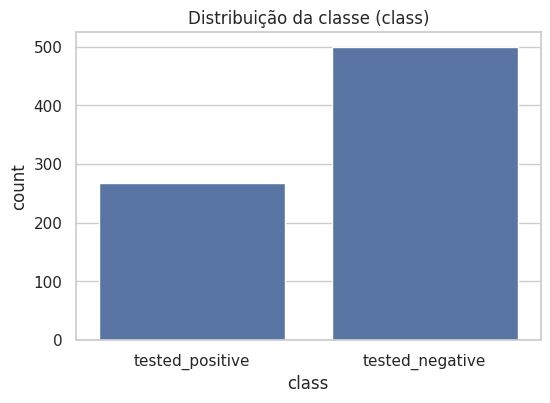

In [24]:
print("\nDistribuição da classe (class):")
print(df["class"].value_counts())
print(df["class"].value_counts(normalize=True)*100)

plt.figure(figsize=(6,4))
sns.countplot(x="class", data=df)
plt.title("Distribuição da classe (class)")
plt.show()

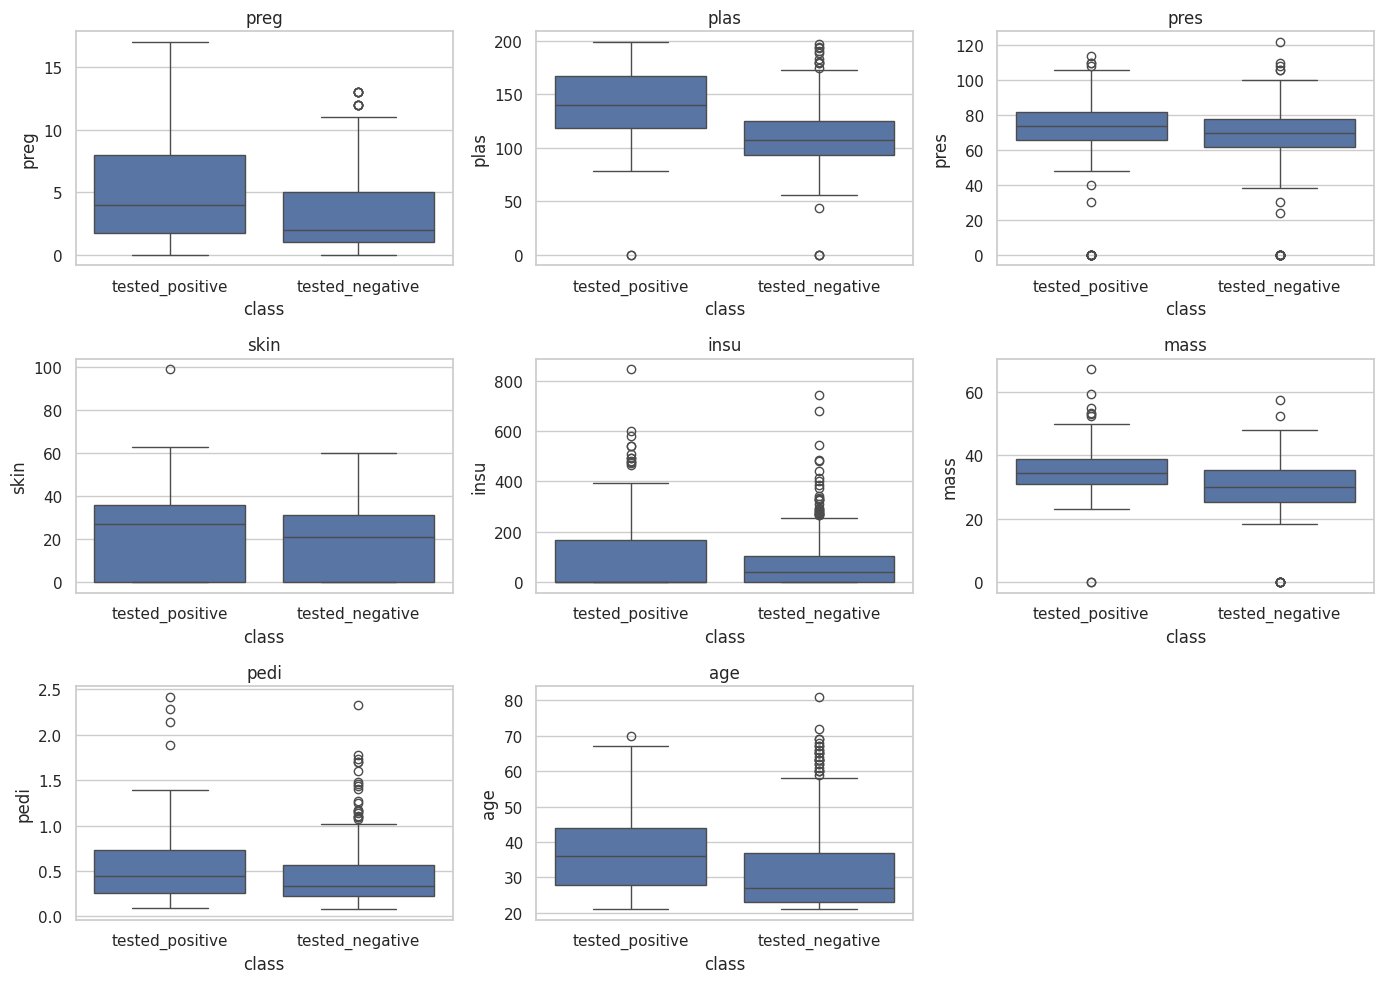

In [27]:
#Observar as categorias aassociadas à classe
cols = ["preg","plas","pres","skin","insu","mass","pedi","age"]

plt.figure(figsize=(14,10))
for i, c in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x="class", y=c)
    plt.title(c)

plt.tight_layout()
plt.show()

- A classe está balanceada?

  - Não está balanceadaa pois podemos observar muito mais instâncias em tested_negative ~65% do que tested_positive ~35%.

- Quais categorias parecem associadas à classe?

  - plas, mass, pedi, age e preg. Essas variáveis tendem a apresentar valores maiores nos casos positivos. As variáveis pres, skin e insu mostram uma associação mais fraca ou distorcida.


##Tarefa 5: Outliers
1. Gerar um boxplot para cada coluna numérica.
2. Identificar colunas com maior presença de outliers.

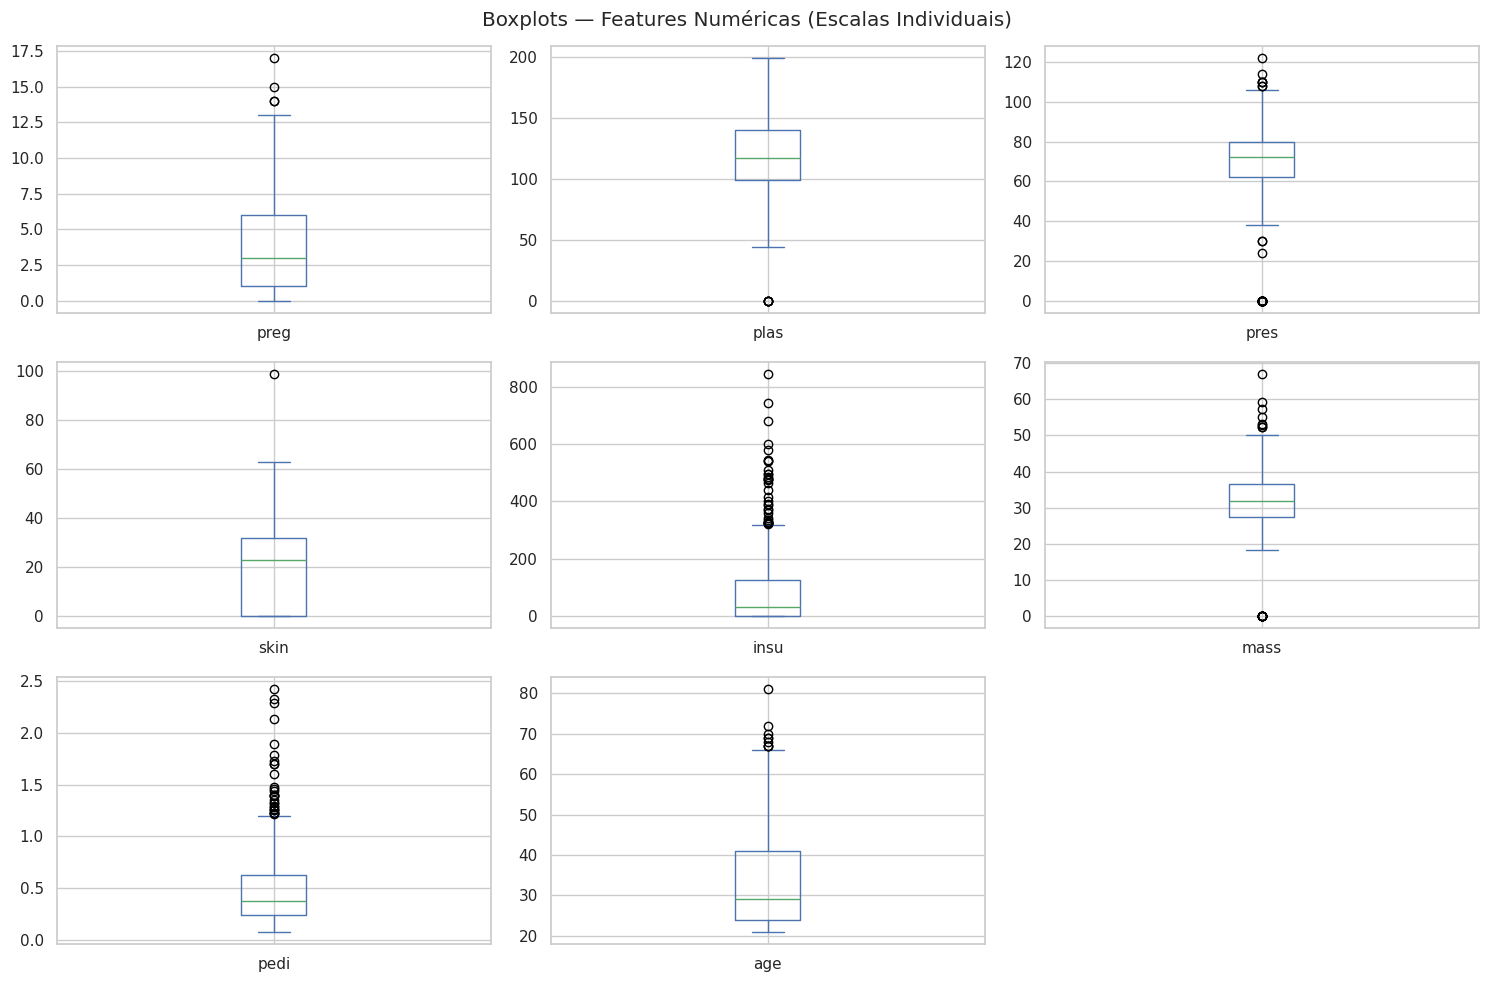

Contagem de Outliers por variável:
pres    45
insu    34
pedi    29
mass    19
age      9
plas     5
preg     4
skin     1
dtype: int64


In [30]:
df[num_cols].plot(kind='box', subplots=True, layout=(3, 3), sharex=False, sharey=False, figsize=(15, 10))

plt.suptitle("Boxplots — Features Numéricas (Escalas Individuais)")
plt.tight_layout() # Ajusta os espaços para não encavalar
plt.show()

outlier_counts = {}
for c in num_cols:
    q1 = df[c].quantile(0.25)
    q3 = df[c].quantile(0.75)
    iqr = q3 - q1
    outlier_mask = (df[c] < q1 - 1.5*iqr) | (df[c] > q3 + 1.5*iqr)
    outlier_counts[c] = outlier_mask.sum()

print("Contagem de Outliers por variável:")
print(pd.Series(outlier_counts).sort_values(ascending=False))

Logo, pres é o que mais tem outliers.

##Tarefa 7: Correlação
1. Calcular matriz de correlação.
2. Gerar heatmap com sns.heatmap.
3. Identificar pares altamente correlacionados.

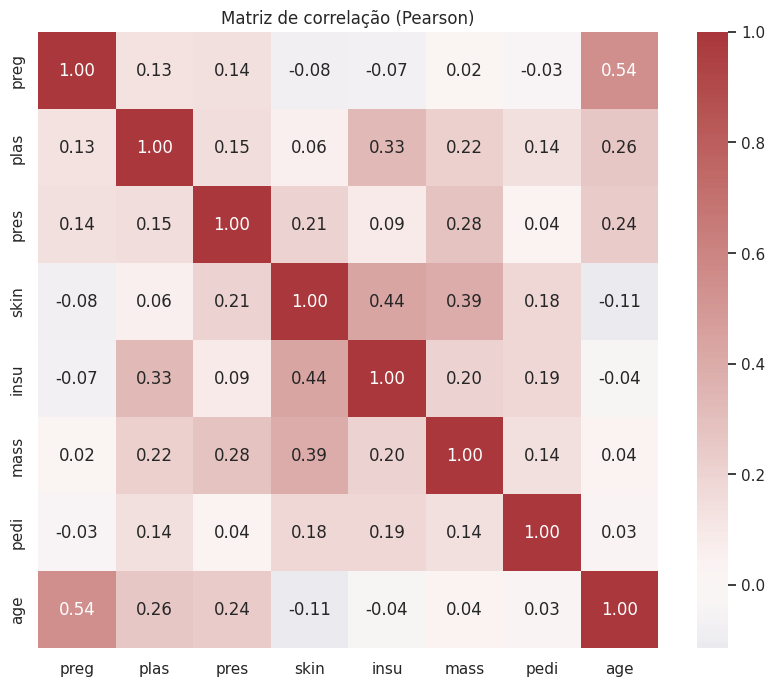

[]

In [31]:
corr = df[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title("Matriz de correlação (Pearson)")
plt.show()

# Pairs altamente correlacionados (abs > 0.6)
high_corr_pairs = []
for i, a in enumerate(num_cols):
    for j, b in enumerate(num_cols):
        if j <= i: continue
        if abs(corr.loc[a,b]) > 0.6:
            high_corr_pairs.append((a,b,corr.loc[a,b]))
high_corr_pairs

Não existem pares altamente correlacionados, o que significa dizer que podemos manter todas as variáveis no modelo pois não vai ter redundância. Porém, devido a ter tantos missing values, essa análise pode estar incorreta e ter sim pares altamente correlacionados.

##Tarefa 8: Scatterplots e Pairplots
1. Escolher as 4 primeiras variáveis numéricas.
2. Gerar combinações 2 a 2.
3. Criar scatterplots coloridos pela classe.
4. Criar um pairplot com amostragem.

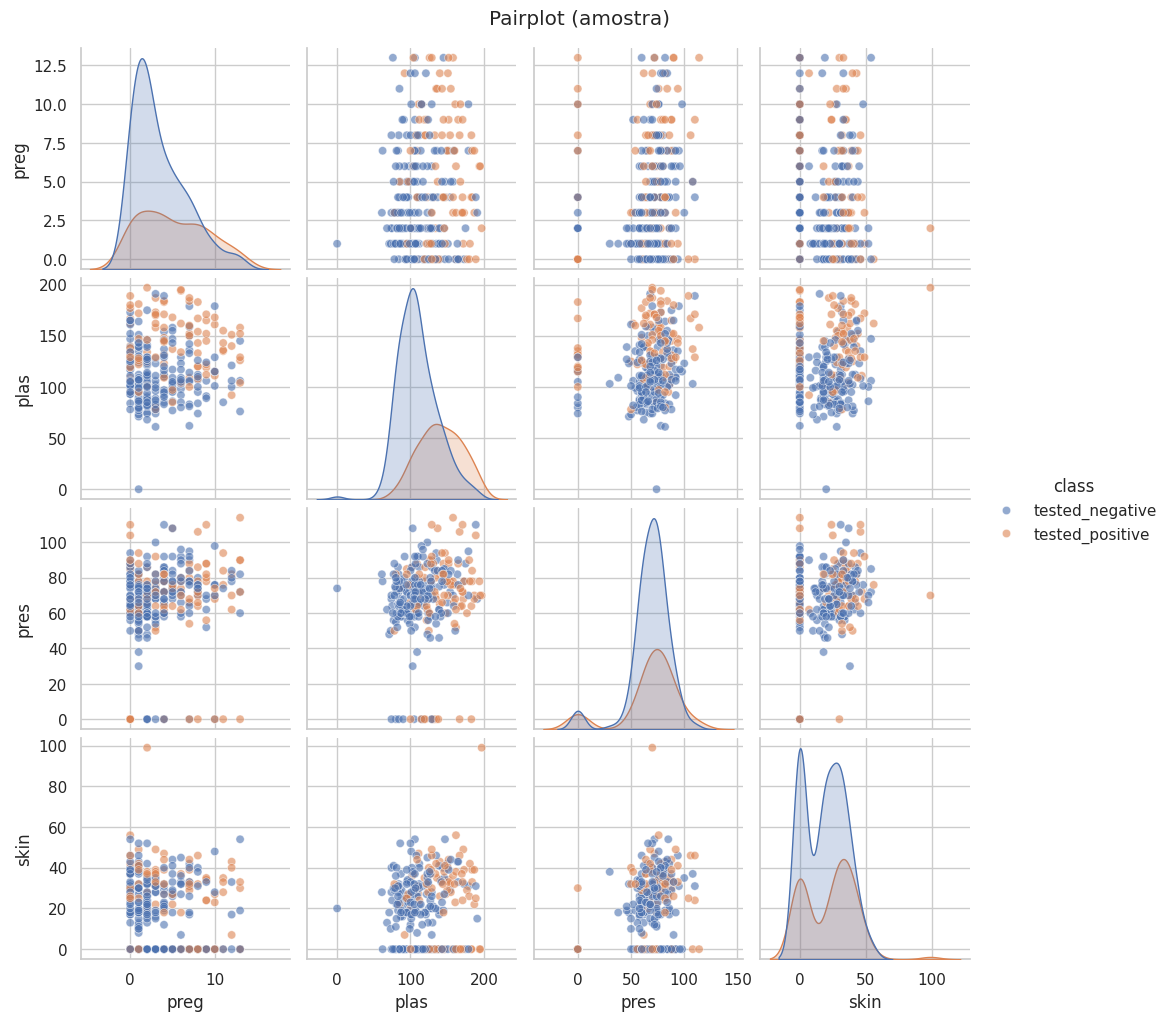

In [33]:
first4 = num_cols[:4]
sns.pairplot(df.sample(300, random_state=42), vars=first4, hue="class", diag_kind="kde", plot_kws={'alpha':0.6})
plt.suptitle("Pairplot (amostra)", y=1.02)
plt.show()

##Tarefa 9: UMAP (Visualização não Linear)
1. Normalizar features numéricas com StandardScaler.
2. One-hot encode das categóricas.
3. Rodar UMAP em 2 dimensões.
4. Plotar a projeção com cores por classe.

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


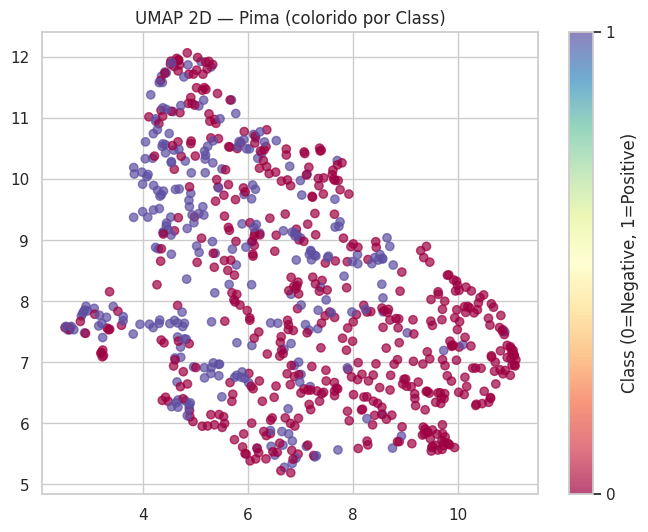

In [35]:
# Preparação: tratar zeros-missing e scaling
df_umap = df.copy()
# substituir zeros por NaN (nas colunas indicadas)
for c in zero_as_missing:
    if c in df_umap.columns:
        df_umap[c] = df_umap[c].replace(0, np.nan)

# Imputar APENAS as colunas numéricas com a mediana
# Isso evita o TypeError ao tentar calcular a mediana de colunas não numéricas
for c in num_cols:
    if c in df_umap.columns:
        df_umap[c] = df_umap[c].fillna(df_umap[c].median())

X = df_umap[num_cols] # 'num_cols' já contém apenas as colunas numéricas
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

reducer = umap.UMAP(n_components=2, random_state=42)
proj = reducer.fit_transform(Xs)

# Converter a coluna 'class' para valores numéricos para usar no gráfico
df_umap['class_numeric'] = df_umap['class'].map({'tested_negative': 0, 'tested_positive': 1})

plt.figure(figsize=(8,6))
plt.scatter(proj[:,0], proj[:,1], c=df_umap["class_numeric"], cmap="Spectral", alpha=0.7)
plt.colorbar(ticks=[0,1], label='Class (0=Negative, 1=Positive)') # Atualizar o rótulo da barra de cores
plt.title("UMAP 2D — Pima (colorido por Class)") # Atualizar o título do gráfico
plt.show()